## Packages

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_house_data=pd.read_csv('House-Rent-Data/House_Rent_Dataset.csv')

In [4]:
import re
pattern=r'(^[\w ]*) out[a-zA-Z ]*([\d]*)'
df_house_data[['FloorNo','TotalFloor']] = df_house_data['Floor'].str.extract(pattern)

In [5]:
df_house_data['Posted On']=pd.to_datetime(df_house_data['Posted On'])

In [6]:
df_house_data.drop(columns=['Posted On','Floor','Area Locality'],inplace=True)

In [7]:
df_house_data
filtered_df = df_house_data.loc[df_house_data['Rent'] < 20000].reset_index(drop=True)


filtered_df.reset_index
df_house_data=filtered_df

In [8]:
filtered_df.to_csv('clean_data_rent.csv')

In [9]:
object_columns = df_house_data.select_dtypes(include='object').columns
int_columns = df_house_data.select_dtypes(include='int64').columns

print(f'Object Type columns are:\n{object_columns}')
print(f'Int Type columns are:\n{int_columns}')

Object Type columns are:
Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact', 'FloorNo', 'TotalFloor'],
      dtype='object')
Int Type columns are:
Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')


In [10]:
df_house_data['Area Type']=df_house_data['Area Type'].astype('category')

categorical_columns = ['Area Type','City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact','FloorNo','TotalFloor']

In [11]:
from sklearn.calibration import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# label_encoder = LabelEncoder()
df_house_data['FloorNo'] = label_encoder.fit_transform(df_house_data['FloorNo'])
df_house_data['TotalFloor'] = label_encoder.fit_transform(df_house_data['TotalFloor'])

# onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
# onehot_encoded = onehot_encoder.fit_transform(df_house_data[categorical_columns])
# onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
# df_encoded = pd.concat([df_house_data, onehot_df], axis=1)
# df_encoded.drop(categorical_columns, axis=1, inplace=True)

NameError: name 'label_encoder' is not defined

In [ ]:
columns=df_encoded.columns

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Assuming df_encoded is your DataFrame
# columns_to_scale = ['BHK',
#                     'Size',
#                     'Bathroom']

# X = df_encoded.drop(columns='Rent')
# print(X)
# y = df_encoded['Rent']
# scaler = StandardScaler()
# # Fit the scaler on the original prices (y_train) before scaling
# scaler.fit(y.values.reshape(-1, 1))

# # Use the inverse_transform method to get back the original prices
# original_prices = scaler.inverse_transform(
#     df_encoded['Rent'].values.reshape(-1, 1))

# # Fit and transform the specified columns
# df_encoded[columns_to_scale] = scaler.fit_transform(
#     df_encoded[columns_to_scale])
# print(df_encoded)

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, r2_score
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # Generate polynomial features (degree=2)
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Initialize linear regression model
# model = LinearRegression()

# # Use cross_val_score with R-squared as the scoring function
# cross_val_r2 = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=make_scorer(r2_score))

# # Display the cross-validated R-squared scores
# print("Cross-validated R-squared scores:", cross_val_r2)
# print("Mean R-squared:", np.mean(cross_val_r2))

# # Fit the model on the training data with polynomial features
# model.fit(X_train_poly, y_train)

# # Make predictions on the test data with polynomial features
# y_pred_poly = model.predict(X_test_poly)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

cross_val_r2 = cross_val_score(model, X, y, cv=5, scoring=make_scorer(r2_score))

print("Cross-validated R-squared scores:", cross_val_r2)
print("Mean R-squared:", cross_val_r2.mean())

model.fit(X_train, y_train)

Cross-validated R-squared scores: [0.01106065 0.46598926 0.33962826 0.38257971 0.33805395]
Mean R-squared: 0.30746236770175983


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2435.800393669944


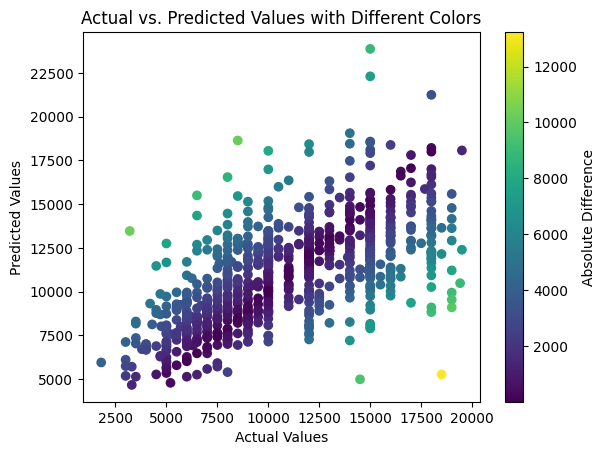

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
# Calculate absolute differences between actual and predicted values
absolute_differences = np.abs(y_test - y_pred)

# Choose colors based on the absolute differences
colors = absolute_differences

# Visualize predicted vs. actual values with different colors
plt.scatter(y_test, y_pred, c=colors, cmap='viridis')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Different Colors')
plt.colorbar(label='Absolute Difference')
plt.show()

Mean Absolute Error: 2435.800393669944


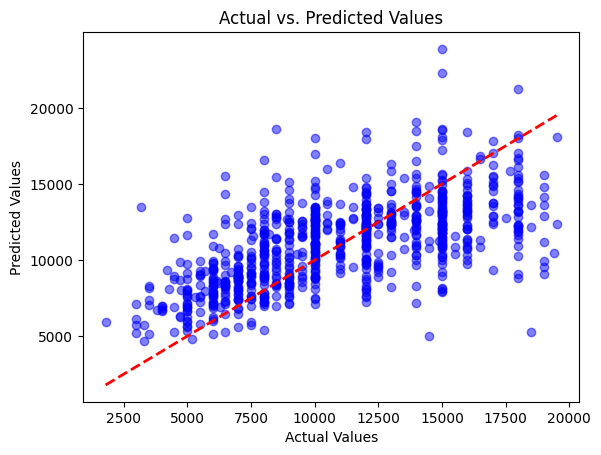

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs. predicted values
X_train, X_test, y_train, y_test
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


R-squared: 0.3803079374193886


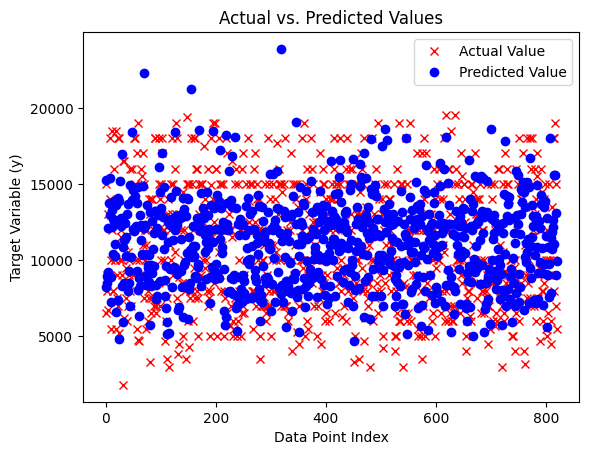

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(y_test)), y_test, marker='x', linestyle='', color='r', label="Actual Value")
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='', color='b', label='Predicted Value')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Data Point Index")
plt.ylabel("Target Variable (y)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {np.sqrt(mse)}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 2435.800393669944
Mean Squared Error (MSE): 3106.4483217540114
R-squared (R2): 0.3803079374193886
